In [1]:
!pip install hdf5storage

In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [184]:
import os
import cv2
import numpy as np
images=np.array
Seg=np.array
i=0
j=0
Seg=[]
images=[]
# Example usage
ll=[49,50,51,52,53,54,58,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97]
images_og=fr"C:\Users\aagar\OneDrive\Desktop\Images-OG"
for a in ll:
    images_dir =  fr'C:\Users\aagar\PycharmProjects\black\Data_Extraction\Images\{a}'
    # Iterate over the images in the directory
    for filename in os.listdir(images_dir):
        # Load the image
        image_path = os.path.join(images_dir, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #cv2.IMREAD_GRAYSCALE
        # Preprocess the image (e.g., resize, normalize)
        image=cv2.resize(image, dsize=(256, 256))
        # Perform any necessary image preprocessing steps here
        
        # Normalize the image
        if("bottom" in filename):
            continue
        if("HGE" in filename):
            image=image/255.0
            image[image > 0.5] = 1
            image[image <= 0.5] = 0
            Seg.append(image)
        # Append the normalized image to the list
        else:
            image=image/255.0
            images.append(image)
        print(np.unique(image))
    
    # Convert the list of images to a NumPy array
Seg=np.array(Seg)
images=np.array(images)
    
# Print the shape of the normalized images array
print("Shape of normalized images array:", images.shape, Seg.shape)


[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

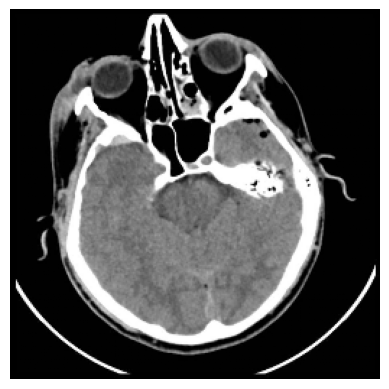

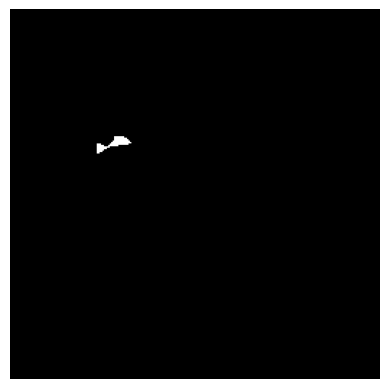

In [185]:
plt.imshow(images[0])
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(Seg[0])
plt.axis('off')  # Turn off the axis
plt.show()

In [137]:
for i in range(images.shape[0]):
  images[i,:, :] = (images[i,:, :] - np.min(images[i,:, :]))/ (np.max(images[i,:, :])-np.min(images[i,:, :]) )
for i in range(Seg.shape[0]):
  Seg[i,:, :] = (Seg[i,:, :] - np.min(Seg[i,:, :]))/ (np.max(Seg[i,:, :])-np.min(Seg[i,:, :]) )

In [ ]:
pip install tensorflow

In [7]:
pip install hdf5storage

  Using cached hdf5storage-0.1.19-py2.py3-none-any.whl (53 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-image

  Using cached scikit_image-0.21.0-cp39-cp39-win_amd64.whl (22.9 MB)
  Using cached imageio-2.31.1-py3-none-any.whl (313 kB)
  Using cached tifffile-2023.4.12-py3-none-any.whl (219 kB)
  Using cached PyWavelets-1.4.1-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import argparse
import sys
import numpy as np
import hdf5storage
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

import skimage.io as io
import skimage.transform as trans
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [4]:
from keras.losses import binary_crossentropy
smooth = 1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1.-dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_coef_loss(y_true, y_pred)

In [11]:
!pip install scikit-learn


  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [186]:
from sklearn.model_selection import train_test_split
print(len(images))
images_train, images_test, Seg_train, Seg_test = train_test_split(images,Seg,test_size=0.2,train_size=0.8,random_state=7)
images_test, images_cv, Seg_test, Seg_cv = train_test_split(images_test,Seg_test,test_size = 0.5,train_size =0.5,random_state=5)
print(len(images_train),len(Seg_train),len(images_test),len(Seg_test))



1590
1272 1272 159 159


In [187]:
print ("number of training examples = " + str(images_train.shape[0]))
print ("number of development examples = " + str(images_cv.shape[0]))
print ("number of test examples = " + str(images_test.shape[0]))
print ("Images_train shape: " + str(images_train.shape))
print ("Masks_train shape: " + str(Seg_train.shape))
print ("Images_val (dev) shape: " + str(images_cv.shape))
print ("Masks_val (dev) shape: " + str(Seg_cv.shape))
print ("Images_test shape: " + str(images_test.shape))
print ("Masks_test shape: " + str(Seg_test.shape))

number of training examples = 1272
number of development examples = 159
number of test examples = 159
Images_train shape: (1272, 256, 256, 3)
Masks_train shape: (1272, 256, 256, 3)
Images_val (dev) shape: (159, 256, 256, 3)
Masks_val (dev) shape: (159, 256, 256, 3)
Images_test shape: (159, 256, 256, 3)
Masks_test shape: (159, 256, 256, 3)


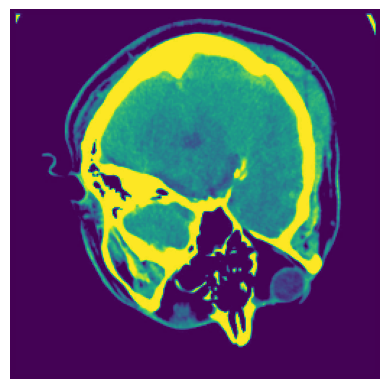

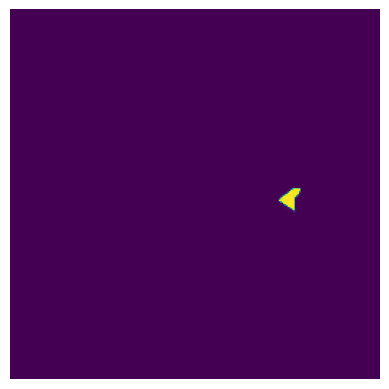

In [147]:
plt.imshow(images_test[0])
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(Seg_test[0])
plt.axis('off')  # Turn off the axis
plt.show()

In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
import random as r
import math
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as keras
import os
import argparse
import sys
import cv2
import skimage.transform as trans

In [ ]:

#Not Using


import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv2D(num_filters, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    return x

def unet_model(input_shape=(256, 256, 1), num_classes=2):
    inputs = Input(input_shape)
    
    # Contracting Path
    c1 = conv_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = conv_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = conv_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3)
    
    c4 = conv_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4)
    
    c5 = conv_block(p4, 1024)
    
    # Expansive Path
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = conv_block(u6, 512)
    
    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = conv_block(u7, 256)
    
    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = conv_block(u8, 128)
    
    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = conv_block(u9, 64)
    
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Example usage
input_shape = (256, 256, 1)
num_classes = 3

# Create random input CT scan image and mask

# Expand dimensions to match input_shape
#images_train = np.expand_dims(images_train, axis=-1)
#Seg_train = np.expand_dims(Seg_train, axis=-1)

# Create the model
model = unet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(images_train, Seg_train, validation_data=(images_cv, Seg_cv), epochs=8, batch_size=1)

print(model.evaluate(images_test,Seg_test))


# Save the trained model
model.save('unet_model.h5')

In [526]:
predictions = model.predict(images_test)

5/5 [==============================] - 10s 2s/step


In [128]:
print(images_train[0].shape)
pr = predictions[0][...,1]
pred=(((predictions[9][...,1]))+((predictions[9][...,0])))
print(pred)
print("-------------------------")
print(Seg_test[3])
print(pr.shape)

(256, 256)
[[0.9999994  1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.99999994]]
-------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(256, 256)


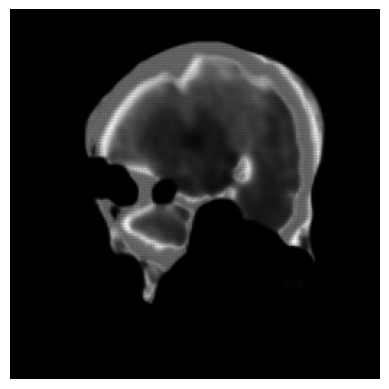

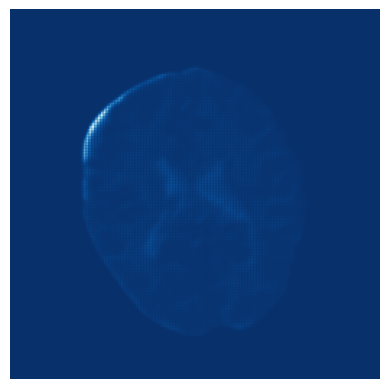

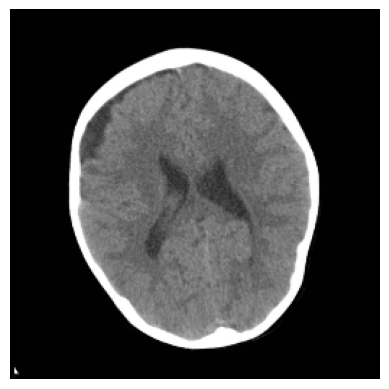

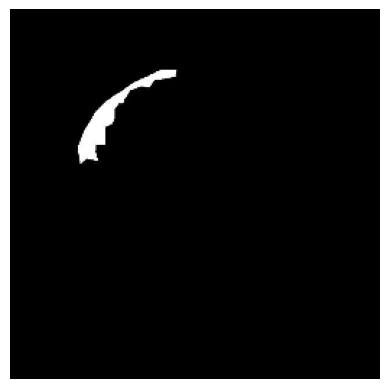

In [129]:
plt.imshow(predictions[0][...,0],cmap='gray')
plt.axis('off')  # Turn off the axis
plt.imshow(predictions[0][...,1],cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(pred, cmap='Blues')
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(images_test[9], cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(Seg_test[9], cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

In [130]:
print(images_train[0].shape)
print(predictions[0].shape)
pred=(((predictions[8][...,1])+((predictions[8][...,0]))-(predictions[8][...,2])))
print(pred)
print("-------------------------")
print(Seg_test[3])

(256, 256)
(256, 256, 3)
[[0.99999917 1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
-------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[0.0000000e+00 1.1756163e-38 1.1756880e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


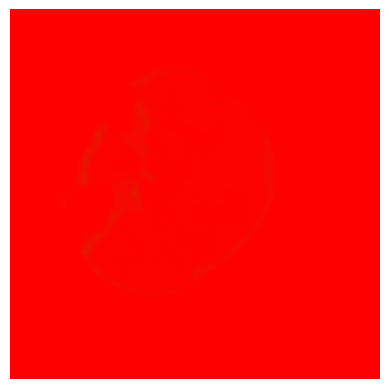

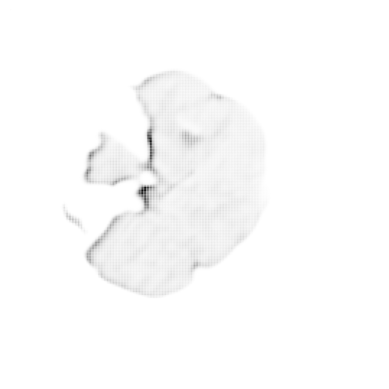

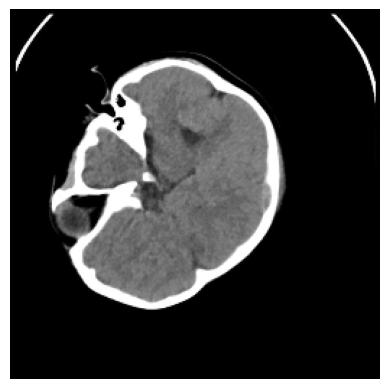

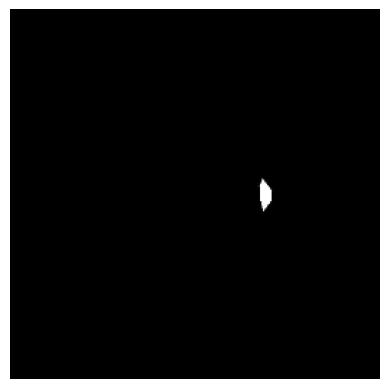

In [131]:
  # Turn off the axis
print(np.unique(predictions))
plt.imshow(predictions[8],cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(pred, cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(images_test[8], cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(Seg_test[8], cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

5/5 [==============================] - 50s 10s/step - loss: 0.1130 - accuracy: 0.9888
[0.11297058314085007, 0.9887754917144775]
5/5 [==============================] - 36s 7s/step


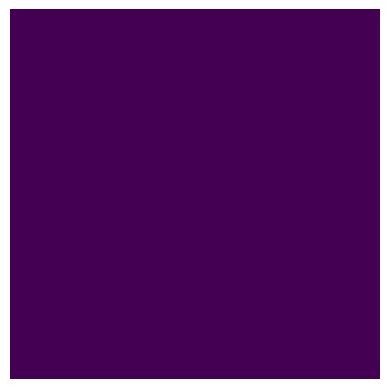

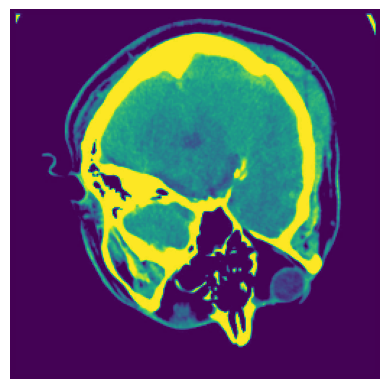

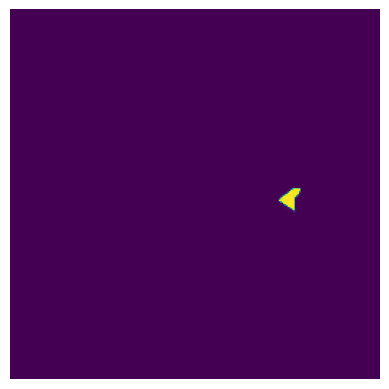

In [142]:
#Not Using

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split

# Define the UNet model architecture
def unet(input_shape):
    inputs = tf.keras.Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = tf.keras.layers.Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # Bridge
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)
    
    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = Concatenate(axis=3)([drop4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = Concatenate(axis=3)([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = Concatenate(axis=3)([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = Concatenate(axis=3)([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)
    
    model = Model(inputs, outputs)
    return model

image_height = 256
image_width = 256
batch_size = 1
num_epochs = 1
learning_rate = 0.001

# Load and preprocess the images and masks



# Create the UNet model
model = unet(input_shape=(image_height, image_width,1))

# Compile the model
#model.compile(optimizer=Adam(learning_rate=learning_rate), loss=BinaryCrossentropy())
model.compile(optimizer=Adam(learning_rate=learning_rate), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Train the model

model.fit(images_train, Seg_train, validation_data=(images_cv, Seg_cv), epochs=num_epochs, batch_size=batch_size)

print(model.evaluate(images_test,Seg_test))

predictions = model.predict(images_test)

plt.imshow(predictions[0])
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(images_test[0])
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(Seg_test[0])
plt.axis('off')  # Turn off the axis
plt.show()

In [127]:
print(np.unique(images_test[0]))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

In [25]:
print(predictions.shape)
predictions=predictions.reshape(191,64,64)
print(predictions.shape)
print(Seg_test.shape)

(191, 64, 64, 1)
(191, 64, 64)
(191, 64, 64)


In [26]:
import numpy as np
from sklearn.metrics import jaccard_score, f1_score

def calculate_iou(y_true, y_pred):
    intersection = np.logical_and(y_pred, y_true)
    union = np.logical_or(y_true, y_pred)
    print(np.sum(intersection) , np.sum(union))
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    dice_score = 2 * np.sum(intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice_score

def calculate_pixel_accuracy(y_true, y_pred):
    pixel_accuracy = np.sum(y_true == y_pred) / y_true.size
    return pixel_accuracy

# Assuming you have ground truth masks (y_true) and predicted masks (y_pred) as numpy arrays
y_true=Seg_test
y_pred=predictions
iou = calculate_iou(y_true, y_pred)
dice = calculate_dice(y_true, y_pred)
pixel_accuracy = calculate_pixel_accuracy(y_true, y_pred)

print("Intersection over Union (IoU):", iou)
print("Dice Coefficient:", dice)
print("Pixel Accuracy:", pixel_accuracy)


0 3433
Intersection over Union (IoU): 0.0
Dice Coefficient: 0.0
Pixel Accuracy: 0.9956118598658377


In [ ]:
pip install torchvision

#Final Model 

In [227]:

EPOCHS = 50
BATCH_SIZE = 32
learning_rate = 1e-4
smooth=100


def dice_coefficients(y_true, y_pred, smooth=100):
    """
    Computes the Dice similarity coefficient between the true and predicted values.

    The Dice coefficient is a statistical metric used to gauge the similarity of two samples.
    With a range from 0 to 1, the Dice coefficient is 1 when the two samples are identical and
    0 when they share no elements. A smoothing term is included to prevent division by zero.

    This function is typically used as a loss function for binary segmentation tasks,
    where the true and predicted values are binary masks of the same size.

    Parameters:
    -----------
    y_true : tensor
        The ground truth values. Typically a binary mask.

    y_pred : tensor
        The predicted values. Typically a binary mask.

    smooth : float, optional
        A smoothing factor to prevent division by zero. Default is 100.

    Returns:
    --------
    float
        The Dice similarity coefficient between the true and predicted values.

    Note:
    -----
    The inputs are flattened to 1D tensors before computation to handle
    both single and multi-channel inputs.
    """

    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection + smooth) / (union + smooth)


def dice_coefficients_loss(y_true, y_pred, smooth=100):
    """
    The Dice loss function for image segmentation models.

    The Dice loss is a measure of the overlap between the prediction (y_pred)
    and the ground truth (y_true). It ranges from 0 to 1, where a Dice loss
    of 1 indicates perfect overlap (i.e., a perfect segmentation), while a Dice
    loss of 0 indicates no overlap.

    The 'smooth' parameter is a small constant added to the numerator and
    denominator of the Dice coefficient to avoid division by zero errors
    and to stabilize the training.

    Parameters:
    y_true (tf.Tensor): Ground truth. Tensor of the same shape as y_pred.
    y_pred (tf.Tensor): Model prediction. Tensor output from the model.
    smooth (float, optional): A smoothing constant to avoid division by zero errors. Default is 100.

    Returns:
    float: The computed Dice loss.

    Why the negative sign here i.e. -dice_coefficients

    most optimization algorithms are designed to minimize a function rather than maximize it. Therefore, to convert the maximization problem to a minimization problem, we take the negative of the Dice coefficient. As a result, when the Dice coefficient is high (which is good), the loss is low, and when the Dice coefficient is low (which is bad), the loss is high. This allows the model to use standard optimization techniques to find the best parameters.

    """

    return -dice_coefficients(y_true, y_pred, smooth)


def iou(y_true, y_pred, smooth=100):
    """
    Calculates the Intersection over Union (IoU) between the true and predicted values.

    IoU, also known as the Jaccard Index, is a metric used to quantify the percent overlap
    between the target mask and our prediction output. It's often used in segmentation problems
    to evaluate the quality of predictions.

    This function is generally used for evaluating segmentation tasks where the true and
    predicted outputs are binary masks of the same size.

    Parameters:
    -----------
    y_true : tensor
        The ground truth values. Typically a binary mask.

    y_pred : tensor
        The predicted values. Typically a binary mask.

    smooth : float, optional
        A smoothing factor to prevent division by zero. Default is 100.

    Returns:
    --------
    float
        The Intersection over Union (IoU) between the true and predicted values.

    Note:
    -----
    The inputs are not flattened to 1D tensors before computation because Keras backend
    operations automatically broadcast the tensors to the appropriate shapes.
    """
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

""" Why intersection = K.sum(y_true * y_pred) in above

The line intersection = K.sum(y_true * y_pred) is calculating the intersection of two sets, where the sets are represented as binary masks (for a segmentation problem). The intersection is basically the overlapping region of the two sets.

This is done by performing an element-wise multiplication between the true values (y_true) and the predicted values (y_pred). In the context of binary masks, this operation essentially counts the number of pixels where both the true and predicted masks are 1 (indicating a positive class).

This is because in a binary mask, a pixel value of 1 denotes the presence of the object of interest (in a segmentation task, for instance), and a pixel value of 0 denotes the background or absence of the object. Thus, when both y_true and y_pred are 1, it means that both the ground truth and the prediction agree that there is an object at that particular pixel location.

In the context of binary masks for a segmentation problem, the masks represent the region of interest in an image, where '1' denotes the presence of an object (or class) and '0' denotes the absence of that object (or background).

When we multiply these masks element-wise (y_true * y_pred), we are looking for places where both masks agree that there is an object of interest. If both y_true and y_pred are 1 at a given pixel, then the product is 1, indicating an intersection at that pixel. If either of them is 0 at a given pixel, then the product is 0, indicating no intersection.

By summing up all these products (K.sum(y_true * y_pred)), we are effectively counting the number of pixels where both the ground truth (y_true) and the prediction (y_pred) agree that there is an object of interest. This is the intersection of the ground truth and prediction.


The K.sum() operation then sums up all these overlapping '1's to give a single number representing the total intersection, or overlap, between the true and predicted values.
"""


def jaccard_distance(y_true, y_pred):
    """
    Function to compute the Jaccard distance between the true labels and the predicted labels.

    The Jaccard distance, which is a measure of dissimilarity between sets, is computed as one minus
    the intersection over union (IoU) of the sets. A lower Jaccard distance between the predicted labels
    and the true labels indicates a better model fit.

    Parameters:
    y_true (np.array): The ground truth label array (binary mask).
    y_pred (np.array): The predicted label array (binary mask).

    Returns:
    float: The Jaccard distance between the ground truth labels and the predicted labels.
    """

    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    return -iou(y_true_flatten, y_pred_flatten)


In [264]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import (
    Input,
    Activation,
    BatchNormalization,
    Dropout,
    Lambda,
    Conv2D,
    Conv2DTranspose,
    MaxPooling2D,
    concatenate,
)
from tensorflow.keras import backend as K


def unet_fin(input_size=(256, 256, 3)):
    """
    This function creates and returns a U-Net model. U-Net is a type of convolutional neural network
    designed for fast and precise segmentation of images. It consists of a contracting (downsampling)
    path and an expansive (upsampling) path, which gives it a U-shaped architecture.

    Parameters:
    -----------
    input_size : tuple of int
        The size of the input images. It is a 3-tuple for (height, width, channels).
        Default is (256, 256, 3).

    Returns:
    --------
    model : keras.models.Model
        The constructed U-Net model.
    """
    inputs = Input(input_size)

    # First DownConvolution / Encoder Leg will begin, so start with Conv2D
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(inputs)
    bn1 = Activation("relu")(conv1)
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation("relu")(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(pool1)
    bn2 = Activation("relu")(conv2)
    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation("relu")(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(pool2)
    bn3 = Activation("relu")(conv3)
    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation("relu")(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(pool3)
    bn4 = Activation("relu")(conv4)
    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation("relu")(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(pool4)
    bn5 = Activation("relu")(conv5)
    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation("relu")(bn5)

    """ Now UpConvolution / Decoder Leg will begin, so start with Conv2DTranspose
    The gray arrows (in the above image) indicate the skip connections that concatenate the encoder feature map with the decoder, which helps the backward flow of gradients for improved training. """
    up6 = concatenate(
        [
            Conv2DTranspose(512, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn5
            ),
            conv4,
        ],
        axis=3,
    )
    """ After every concatenation we again apply two consecutive regular convolutions so that the model can learn to assemble a more precise output """
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(up6)
    bn6 = Activation("relu")(conv6)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation("relu")(bn6)

    up7 = concatenate(
        [
            Conv2DTranspose(256, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn6
            ),
            conv3,
        ],
        axis=3,
    )
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(up7)
    bn7 = Activation("relu")(conv7)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation("relu")(bn7)

    up8 = concatenate(
        [
            Conv2DTranspose(128, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn7
            ),
            conv2,
        ],
        axis=3,
    )
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(up8)
    bn8 = Activation("relu")(conv8)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation("relu")(bn8)

    up9 = concatenate(
        [
            Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding="same")(
                bn8
            ),
            conv1,
        ],
        axis=3,
    )
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(up9)
    bn9 = Activation("relu")(conv9)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation("relu")(bn9)

    conv10 = Conv2D(filters=3, kernel_size=(1, 1), activation="sigmoid")(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:

model = unet_fin(input_size=(256, 256, 3))



decay_rate = learning_rate / EPOCHS

opt = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=["binary_accuracy", iou, dice_coefficients])

callbacks = [ModelCheckpoint('unet.hdf5', verbose=1, save_best_only=True)]

history = model.fit(images_train,Seg_train,
                    steps_per_epoch=len(images_train) / BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=callbacks,
                    validation_data = (images_cv, Seg_cv),
                    validation_steps=len(images_cv) / BATCH_SIZE)

Epoch 1/50
 1/39 [..............................] - ETA: 42:40 - loss: 0.7195 - binary_accuracy: 0.5780 - iou: 0.0074 - dice_coefficients: 0.0147

In [209]:
predictions = model.predict(images_test)

5/5 [==============================] - 47s 10s/step


[6.2635203e-04 1.3950352e-03 2.9289690e-03 ... 6.5305984e-01 6.5308857e-01
 6.5438384e-01]


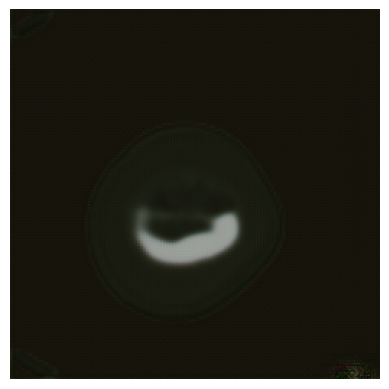

(256, 256, 3)
[0.0000000e+00 6.2635203e-04 1.3950352e-03 ... 6.5305984e-01 6.5308857e-01
 6.5438384e-01]


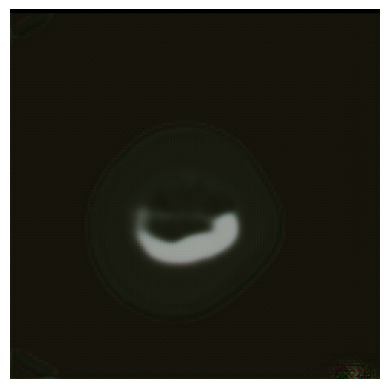

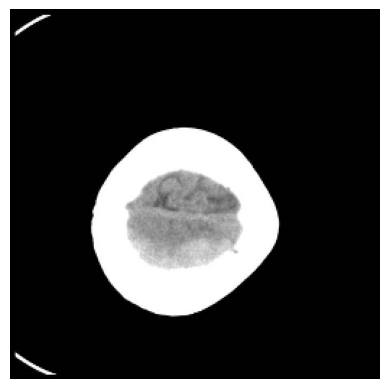

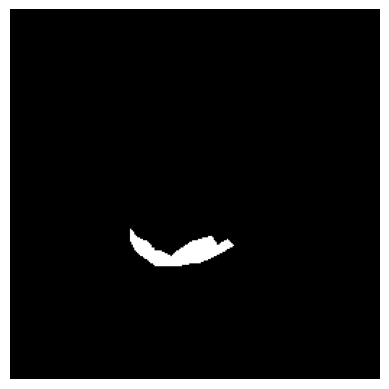

In [257]:
import matplotlib.pyplot as plt

# Assuming you have an image represented as a NumPy array
ind=13
image=predictions[ind]
print(np.unique(image))
plt.imshow(image, cmap='Blues')
plt.axis('off')  # Turn off the axis
plt.show()
print(image.shape)
'''
for i in range(3):
    for j in range(len(image[i])):
        for k in range(len(image[i][j])):
            if(image[i][j][k]>0.3):
                image[i][j][k]=1
            else:
                image[i][j][k]=0;
'''
#image[image > 0.1] = 1
#image[image <= 0.1] = 0
# Display the image
print(np.unique(image))
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(images_test[ind], cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()

plt.imshow(Seg_test[ind], cmap='gray')
plt.axis('off')  # Turn off the axis
plt.show()
